# Car Price Prediction

Author: Kexin Sun

Course Project, UC Irvine, Math 10, F22

## Introduction

My project is to predict the price of future cars by analyzing the data in the data set. I first found out the brands with high sales volume, and then determined the factors affecting the price of the car by analyzing the correlation between various variables. I used Linear regression and train_test_split to analyze the prediction. I mainly analyzed the three most important factors: enginesize, curbweight, and horsepower to increase the accuracy of the model.

## Main portion of the project

### Data Loading

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.isna().any().any()

False

In [5]:
df["Brand"]=df["CarName"].apply(lambda x:x.split(" ")[0])
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
df=df.copy()

In [7]:
df=df.replace(['alfa-romero','maxda','Nissan','porschce','toyouta','vokswagen','volkswagen'],['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw'])

In [8]:
df.drop("CarName",axis=1,inplace=True)

### Data Visualization

In [9]:
c = alt.Chart(df).mark_bar().encode(
    x = "Brand",
    y = "count()",
    color="Brand"
).properties(title="Sales of Each Brand"
)
c

alt.Chart(...)

According to the above chart, we can see that Toyota has the highest sales volume.

In [10]:
avg=df.groupby("Brand")["price"].mean()
avg

Brand
alfa-romeo    15498.333333
audi          17859.166714
bmw           26118.750000
buick         33647.000000
chevrolet      6007.000000
dodge          7875.444444
honda          8184.692308
isuzu          8916.500000
jaguar        34600.000000
mazda         10652.882353
mercury       16503.000000
mitsubishi     9239.769231
nissan        10415.666667
peugeot       15489.090909
plymouth       7963.428571
porcshce      32528.000000
porsche       31118.625000
renault        9595.000000
saab          15223.333333
subaru         8541.250000
toyota         9885.812500
volvo         18063.181818
vw            10077.500000
Name: price, dtype: float64

In [11]:
fig = px.bar(df, x=avg.index, y=avg)
fig.show()

According to the above chart, we can see that the average selling price of Buick and Jaguar are higher than that of other brands.

### Find the correlation

In [12]:
df.dtypes

car_ID                int64
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Brand                object
dtype: object

In [13]:
num_col = df.select_dtypes(exclude=['object']).columns
num = df[num_col].drop(['car_ID'],axis=1)

In [14]:
cormatrix=num.corr()# find the correlationship among the dataset
cormatrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


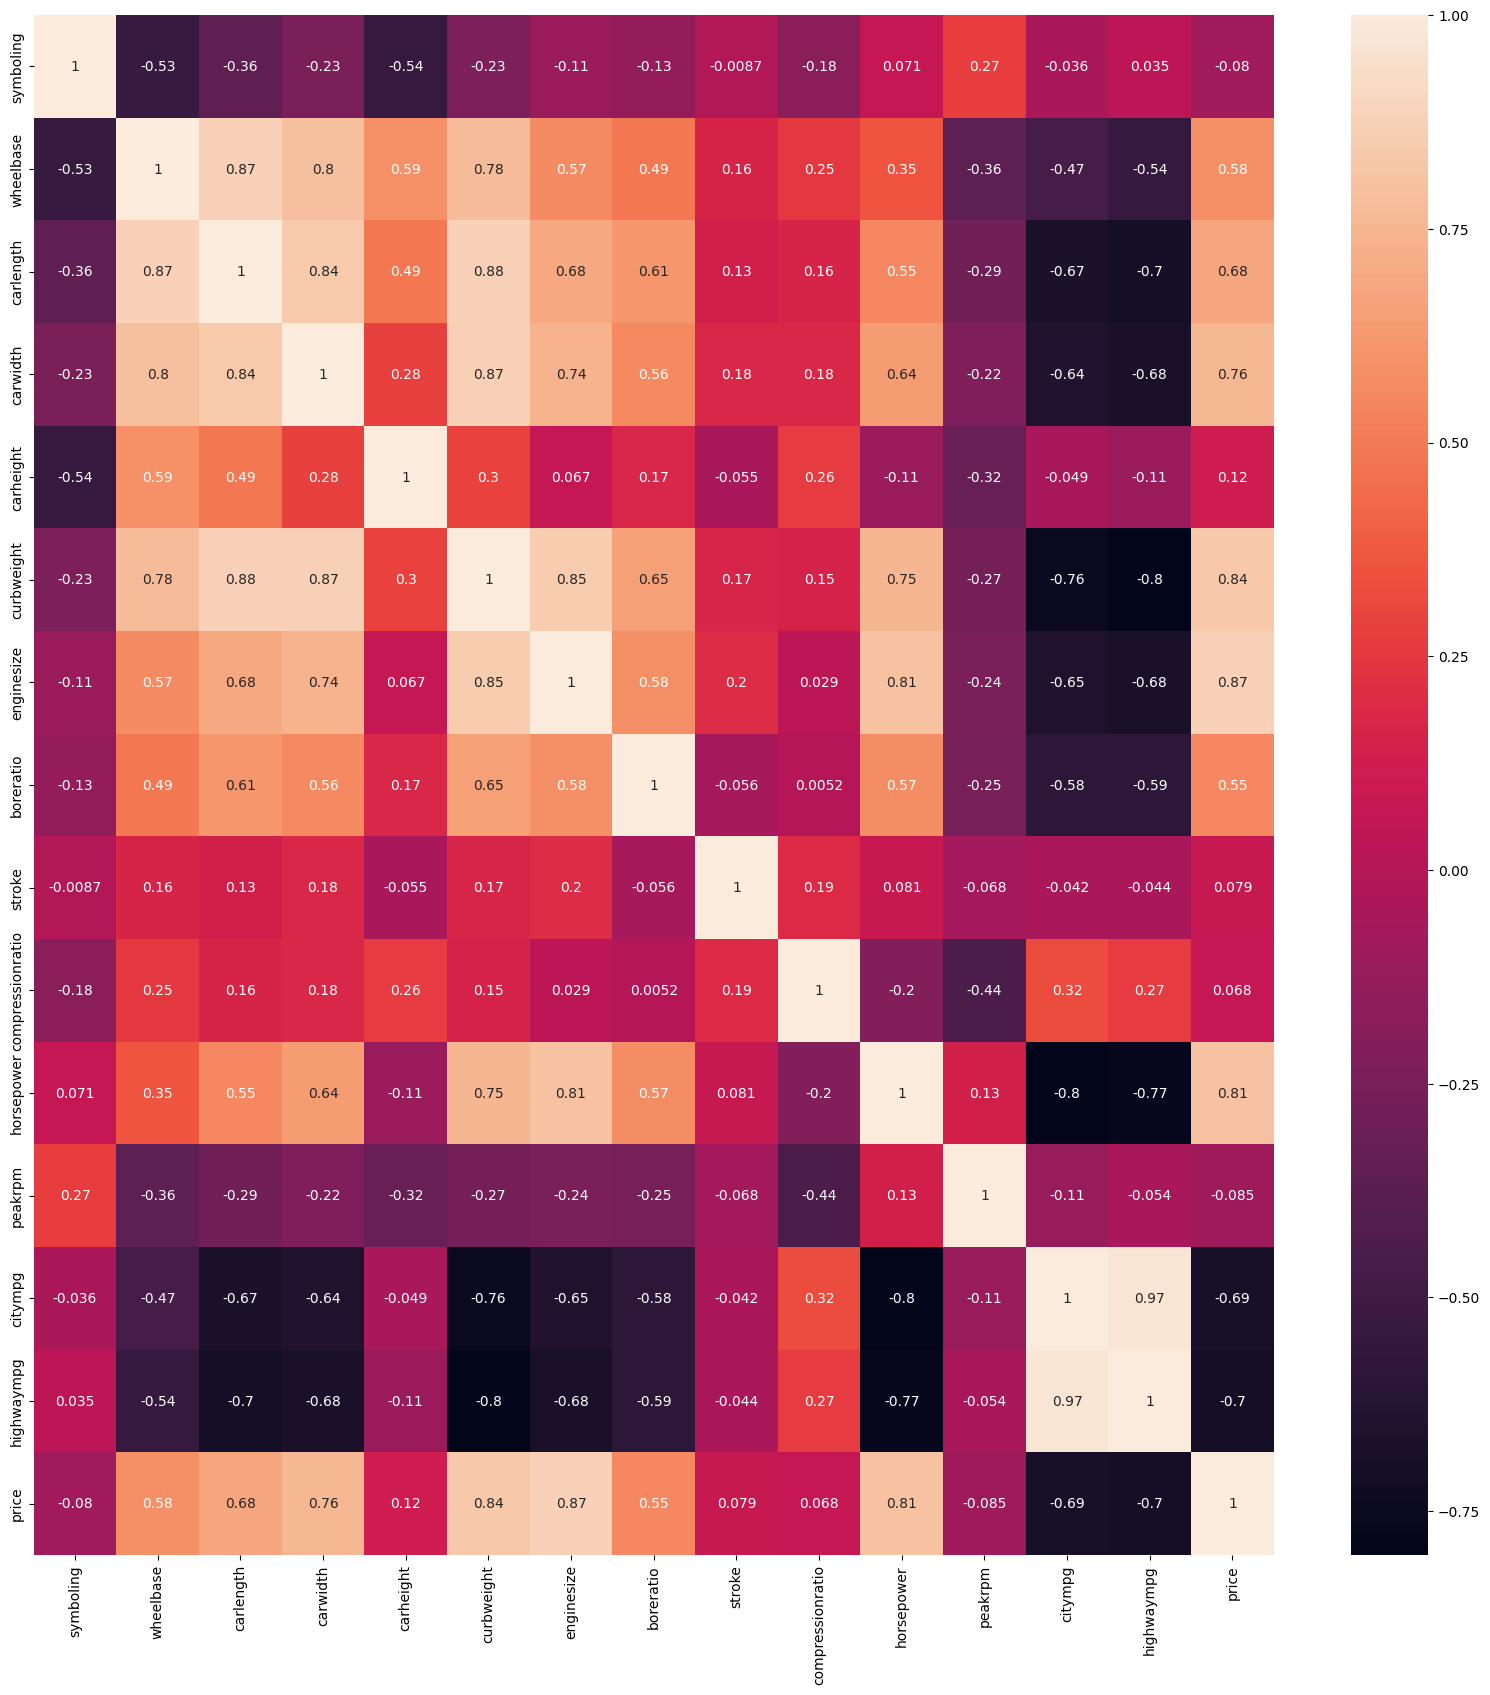

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(cormatrix, annot=True)
plt.show()

From this graph we can see the correlation between the two variables.

In [16]:
df["price"] = df["price"].astype(int)

In [17]:
df2 = df.copy()
df2 = df2.merge(avg.reset_index(),how="left",on= "Brand")
bins = [0,10000,20000,40000]
label = ["cheap","ordinary","expensive"]
df["price_level"] = pd.cut(df2["price_y"],bins,right=False,labels=label)
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,price_level
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romeo,ordinary
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romeo,ordinary
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romeo,ordinary
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,ordinary
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845,volvo,ordinary
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045,volvo,ordinary
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485,volvo,ordinary
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470,volvo,ordinary


The above are car brands in the same price range based on their average price.

In [18]:
cormatrix.sort_values(["price"], ascending = False, inplace = True)
print(cormatrix.price)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


We find a strong positive correlation between enginesize, curbweight, horsepower, carwidth, carlength and car price, while a strong negative correlation between citympg, highwaympg and car price.（Positive correlation: When one variable increases, another will also increase; Negative correlation: An increase in one variable and a decrease in another.）

### Create Linear Regression for the above 7 factors

In [19]:
reg = LinearRegression()
cols=['curbweight','enginesize','horsepower','carwidth','carlength','citympg','highwaympg']
reg.fit(df[cols],df["price"])
pd.Series(reg.coef_,index=cols)

curbweight      3.083904
enginesize     83.155749
horsepower     47.807804
carwidth      630.832670
carlength     -31.697844
citympg       -61.820861
highwaympg     78.983351
dtype: float64

In [20]:
reg.intercept_

-47064.65162829726

In [21]:
reg.coef_

array([  3.08390409,  83.155749  ,  47.80780381, 630.83267019,
       -31.69784366, -61.82086051,  78.98335081])

In [22]:
df["Pred1"] = reg.predict(df[cols])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,price_level,Pred1
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romeo,ordinary,12830.140148
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romeo,ordinary,12830.140148
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romeo,ordinary,18415.125100
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,ordinary,11131.888319
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,ordinary,15365.681176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845,volvo,ordinary,17483.555626
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045,volvo,ordinary,19929.103421
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485,volvo,ordinary,21199.917464
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470,volvo,ordinary,17986.504844


We find seven factors that affect the price and make price forecast, which are enginesize, curbweight, horsepower, carwidth, carlength, citympg and highwaympg.

In [40]:
C=[]
for i in cols:
    c1=alt.Chart(df).mark_circle().encode(
        x=i,
        y="price",
        color="Brand"
    )
    C.append(c1)
alt.vconcat(*C)

alt.VConcatChart(...)

The configuration of this Altair chart was adapted from https://christopherdavisuci.github.io/UCI-Math-10-S22/Proj/StudentProjects/KehanLi.html.

As can be seen from the figure above, enginesize, curbweight, horsepower, carwidth, carlength are positively correlated with price, while citympg, highwaympg are negatively correlated with price.

In [24]:
c2 = alt.Chart(df).mark_circle().encode(
    x="enginesize",
    y="price",
    color="Brand"
)
c3=alt.Chart(df).mark_line(color="Blue").encode(
    x="enginesize",
    y='Pred1',
)
c2+c3

alt.LayerChart(...)

### Linear Regression for the most related 3 factor

In [25]:
cols2=["enginesize","curbweight","horsepower"]

In [26]:
reg2=LinearRegression()
reg2.fit(df[cols2],df["price"])
df["Pred2"]=reg2.predict(df[cols2])

In [27]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,price_level,Pred1,Pred2
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495,alfa-romeo,ordinary,12830.140148,13842.478269
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500,alfa-romeo,ordinary,12830.140148,13842.478269
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500,alfa-romeo,ordinary,18415.125100,18978.147751
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950,audi,ordinary,11131.888319,10721.878046
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450,audi,ordinary,15365.681176,15723.214753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,9.5,114,5400,23,28,16845,volvo,ordinary,17483.555626,16644.477176
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,8.7,160,5300,19,25,19045,volvo,ordinary,19929.103421,19300.290806
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,8.8,134,5500,18,23,21485,volvo,ordinary,21199.917464,20591.319781
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,23.0,106,4800,26,27,22470,volvo,ordinary,17986.504844,17723.606326


In [28]:
reg2.intercept_

-13463.82073148018

In [29]:
reg2.coef_

array([84.87987456,  4.26257543, 48.74660463])

In [30]:
std= StandardScaler()
std.fit(df[cols2])
X= std.transform(df[cols2])

In [31]:
y=df["price"]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.9, random_state=0)

In [33]:
X.shape

(205, 3)

In [34]:
M=LinearRegression()
M.fit(X_train,y_train)
M.score(X_train, y_train)

0.9087845055081182

In [35]:
M.score(X_test, y_test)

0.49538808151370906

In [36]:
print(f''' 
accuracy on Train score: {M.score(X_train, y_train):.1%}
accuracy on Test score: {M.score(X_test, y_test):.1%}
''')

 
accuracy on Train score: 90.9%
accuracy on Test score: 49.5%



In [37]:
pred=M.predict(X_test)

In [38]:
mean_squared_error(y_test, pred)

32337410.48764465

In [39]:
r2_score(y_test,pred)

0.49538808151370906

The model accounted for nearly 91% of the variance of the training data. But the score of testing data is too low, so it is not appropriate.

### Summary

I built a linear regression model to predict future car prices. After comparing the influence of various factors on the final result, I identified three key factors, namely enginesize, curbweight and horsepower. It is also found that citympg, highwaympg and price will be negatively correlated. Based on the analysis of the three main factors, the results show that the accuracy of the model is nearly 91% on the training data set and about 50% on the test data set. The R square of the model is about 50%.

### Reference

Dataframe: https://www.kaggle.com/datasets/gagandeep16/car-sales/code

Plotly: https://plotly.com/python/plotly-express/

seaborn heatmap: https://machinelearningknowledge.ai/seaborn-heatmap-using-sns-heatmap-with-examples-for-beginners/

pandas.cut:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

pandas.astype:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f620a85d-d1ca-4f8c-a911-f5e4c03dc368' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>